<a href="https://colab.research.google.com/github/koc90/part_3_homework_11/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional


In [ ]:
max_features = 10000
maxlen = 500
batch_size = 256
nodes = 64
vect_len = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)



In [ ]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)



In [ ]:
def create_modelRRN(nodes, vect_len, activation='sigmoid'):
  model = Sequential()
  model.add(Embedding(max_features, vect_len))
  model.add(SimpleRNN(nodes))
  model.add(Dense(1, activation=activation))
  return model


In [ ]:
def create_modelLSTM(nodes, vect_len, activation='sigmoid'):
  model = Sequential()
  model.add(Embedding(max_features, vect_len))
  model.add(LSTM(nodes))
  model.add(Dense(1, activation=activation))
  return model

In [ ]:
def create_modelBRNN(nodes, vect_len, activation='sigmoid'):
  model = Sequential()
  model.add(Embedding(max_features, vect_len))
  model.add(Bidirectional(LSTM(nodes)))
  model.add(Dense(1, activation=activation))
  return model

In [ ]:
def model_history_plot(model_history):
  acc = model_history.history['acc']
  val_acc = model_history.history['val_acc']
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Dokładność treningowa')
  plt.plot(epochs, val_acc, 'b', label='Dokładność walidacyjna')
  plt.title('Dokładność treningowa i walidacyjna')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Straty treningowe')
  plt.plot(epochs, val_loss, 'b', label='Straty walidacyjne')
  plt.title('Straty treningowe i walidacyjne')
  plt.legend()
  plt.show()



In [ ]:
def model_prediction(model):
  predictions = model.predict(input_test)


  binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


  for i in range(10):
      print(f"Prognoza: {binary_predictions[i]}, Rzeczywistość: {y_test[i]}")


  test_loss, test_acc = model.evaluate(input_test, y_test)
  print('Strata testowa: {}'.format(test_loss))
  print('Dokładność testowa: {}'.format(test_acc))


In [ ]:
model_RRN = create_modelRRN(nodes, vect_len)
model_RRN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_RRN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 326273 (1.24 MB)
Trainable params: 326273 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_LSTM = create_modelLSTM(nodes, vect_len)
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344897 (1.32 MB)
Trainable params: 344897 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_BRRN = create_modelBRNN(nodes, vect_len)
model_BRRN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_BRRN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 369793 (1.41 MB)
Trainable params: 369793 (1.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historyRNN = model_RRN.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)



Epoch 1/5
69/69 [==============================] - 40s 551ms/step - loss: 0.6949 - acc: 0.5332 - val_loss: 0.6717 - val_acc: 0.5903
Epoch 2/5
69/69 [==============================] - 46s 668ms/step - loss: 0.5959 - acc: 0.6961 - val_loss: 0.5321 - val_acc: 0.7631
Epoch 3/5
69/69 [==============================] - 37s 533ms/step - loss: 0.4252 - acc: 0.8163 - val_loss: 0.3973 - val_acc: 0.8288
Epoch 4/5
69/69 [==============================] - 35s 502ms/step - loss: 0.3512 - acc: 0.8530 - val_loss: 0.3745 - val_acc: 0.8431
Epoch 5/5
69/69 [==============================] - 35s 513ms/step - loss: 0.2882 - acc: 0.8800 - val_loss: 0.3914 - val_acc: 0.8451


In [ ]:
historyLSTM = model_LSTM.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)


Epoch 1/5
69/69 [==============================] - 10s 123ms/step - loss: 0.6844 - acc: 0.5681 - val_loss: 0.7482 - val_acc: 0.5199
Epoch 2/5
69/69 [==============================] - 7s 103ms/step - loss: 0.5319 - acc: 0.7493 - val_loss: 0.4125 - val_acc: 0.8139
Epoch 3/5
69/69 [==============================] - 6s 87ms/step - loss: 0.3863 - acc: 0.8363 - val_loss: 0.3454 - val_acc: 0.8549
Epoch 4/5
69/69 [==============================] - 5s 67ms/step - loss: 0.3202 - acc: 0.8697 - val_loss: 0.3323 - val_acc: 0.8637
Epoch 5/5
69/69 [==============================] - 5s 69ms/step - loss: 0.2763 - acc: 0.8911 - val_loss: 0.4097 - val_acc: 0.8503


In [ ]:
historyBRNN = model_BRRN.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

Epoch 1/5
69/69 [==============================] - 12s 138ms/step - loss: 0.6925 - acc: 0.5225 - val_loss: 0.6909 - val_acc: 0.5311
Epoch 2/5
69/69 [==============================] - 7s 96ms/step - loss: 0.6524 - acc: 0.6337 - val_loss: 0.5282 - val_acc: 0.7447
Epoch 3/5
69/69 [==============================] - 7s 99ms/step - loss: 0.4821 - acc: 0.7814 - val_loss: 0.5409 - val_acc: 0.7289
Epoch 4/5
69/69 [==============================] - 6s 90ms/step - loss: 0.3733 - acc: 0.8437 - val_loss: 0.3730 - val_acc: 0.8423
Epoch 5/5
69/69 [==============================] - 7s 96ms/step - loss: 0.3082 - acc: 0.8768 - val_loss: 0.3193 - val_acc: 0.8672


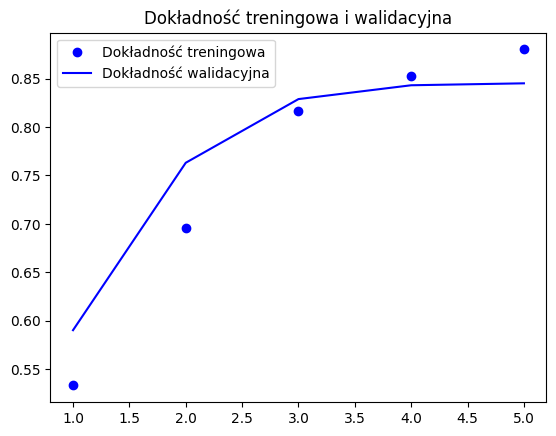

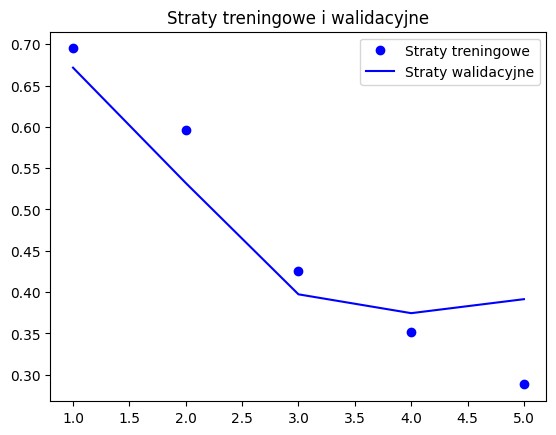

In [ ]:
model_history_plot(model_history=historyRNN)

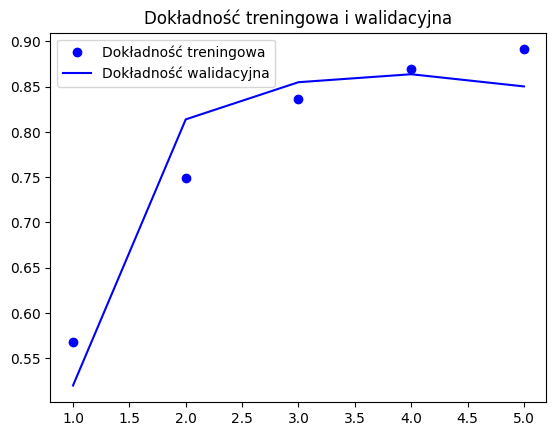

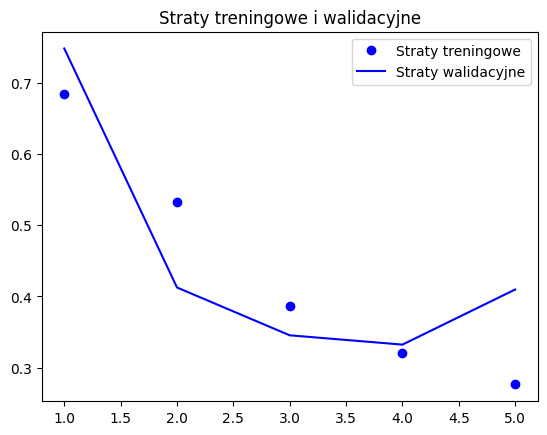

In [ ]:
model_history_plot(model_history=historyLSTM)

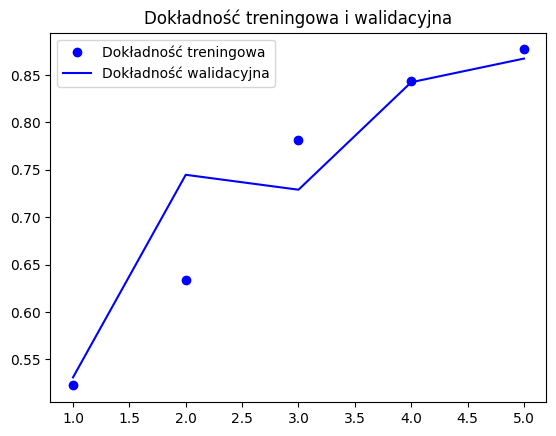

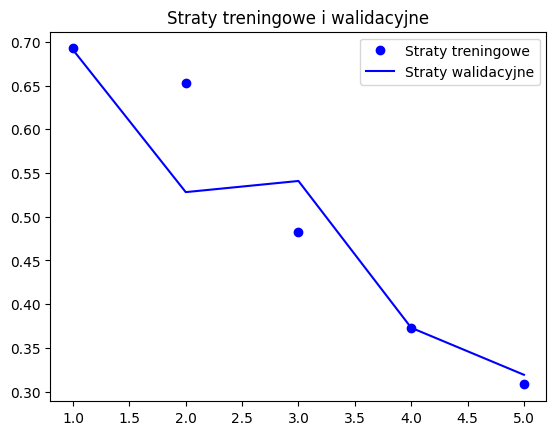

In [ ]:
model_history_plot(model_history=historyBRNN)

In [ ]:
model_prediction(model=model_RRN)

782/782 [==============================] - 30s 39ms/step
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
782/782 [==============================] - 30s 38ms/step - loss: 0.3900 - acc: 0.8437
Strata testowa: 0.38999292254447937
Dokładność testowa: 0.8436800241470337


In [ ]:
model_prediction(model=model_LSTM)

782/782 [==============================] - 6s 8ms/step
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
782/782 [==============================] - 6s 8ms/step - loss: 0.4270 - acc: 0.8430
Strata testowa: 0.42696481943130493
Dokładność testowa: 0.842960000038147


In [ ]:
model_prediction(model=model_BRRN)

782/782 [==============================] - 11s 13ms/step
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 1, Rzeczywistość: 1
Prognoza: 0, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 0
Prognoza: 1, Rzeczywistość: 1
782/782 [==============================] - 11s 14ms/step - loss: 0.3242 - acc: 0.8644
Strata testowa: 0.32415059208869934
Dokładność testowa: 0.864359974861145


Najwyższą dokładność testową uzyskał model BRRN